In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
# warnings reported for function updates, ignore them
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Loading and drop two columns
df = pd.read_csv('modified_dataset.csv')
df = df.drop(['Unnamed: 0','Type'], axis=1)
print(df.shape)
print(df.keys())

(79330, 31)
Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')


In [3]:
df = df.drop(['ReservationStatus','ReservationStatusDate','ADR'], axis=1)

In [4]:
# Data clean with space in strings
# Iterate over each column
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        #remove space in the object type column
        df[col] = df[col].str.strip()

In [5]:
df.columns[df.isin(['NULL']).any()]

Index(['Agent', 'Company'], dtype='object')

In [6]:
#Handling Agent and Company column to remove nulls
df['Agent_bi'] = df['Agent']
df['Agent_bi'][df['Agent_bi']!='NULL'] = 1
df['Agent_bi'] = df['Agent_bi'].replace('NULL',0)
df['Company_bi'] = df['Company']
df['Company_bi'][df['Company_bi']!='NULL'] = 1
df['Company_bi'] = df['Company_bi'].replace('NULL',0)
print(df['Agent_bi'].unique())
print(df['Company_bi'].unique())

[1 0]
[0 1]


In [9]:
#select columns with specific data type
#df_obj = df.select_dtypes(include=[np.object])
df_num = df.select_dtypes(exclude=[np.object])

In [10]:
# Correlation matrix
my_matrix = df_num.corr()
my_matrix

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,RequiredCarParkingSpaces,TotalOfSpecialRequests,Agent_bi,Company_bi
IsCanceled,1.000000,0.309242,-0.003004,0.001580,-0.004331,-0.007343,0.048704,0.053054,-0.027075,-0.030186,-0.065840,0.166643,-0.053134,-0.149500,0.060965,-0.133096,-0.293889,0.066064,-0.091696
LeadTime,0.309242,1.000000,0.027876,0.130392,0.014502,-0.023913,0.058361,0.115792,-0.053567,-0.030333,-0.107900,0.122511,-0.065472,-0.031052,0.187110,-0.077727,-0.132450,0.189527,-0.153908
ArrivalDateYear,-0.003004,0.027876,1.000000,-0.543027,-0.002910,0.034851,0.066234,0.067558,0.055538,-0.008407,-0.028661,-0.195255,0.021302,0.032124,-0.068701,-0.001035,0.135439,-0.026743,0.005571
ArrivalDateWeekNumber,0.001580,0.130392,-0.543027,1.000000,0.061681,-0.001043,-0.008598,0.006947,-0.001217,0.005450,0.002760,0.037032,-0.012149,0.002471,0.017696,-0.003850,0.015773,0.034385,-0.031180
ArrivalDateDayOfMonth,-0.004331,0.014502,-0.002910,0.061681,1.000000,0.000304,-0.011713,-0.001357,0.012826,0.000354,-0.011979,-0.010891,-0.001855,0.014104,0.023152,0.003864,-0.001676,0.016137,-0.004622
StaysInWeekendNights,-0.007343,-0.023913,0.034851,-0.001043,0.000304,1.000000,0.219601,0.082130,0.037525,0.006467,-0.080494,-0.038613,-0.027498,0.045574,-0.056195,-0.024373,0.068762,0.091604,-0.088572
StaysInWeekNights,0.048704,0.058361,0.066234,-0.008598,-0.011713,0.219601,1.000000,0.088253,0.037118,0.005469,-0.094165,-0.050589,-0.040931,0.079888,0.015854,-0.038363,0.064186,0.102894,-0.085206
Adults,0.053054,0.115792,0.067558,0.006947,-0.001357,0.082130,0.088253,1.000000,-0.005835,0.012157,-0.167354,-0.038085,-0.109113,-0.087555,-0.007731,0.011194,0.155642,0.239867,-0.271910
Children,-0.027075,-0.053567,0.055538,-0.001217,0.012826,0.037525,0.037118,-0.005835,1.000000,0.023773,-0.028871,-0.043779,-0.017291,0.046908,-0.036443,0.054961,0.112716,0.030574,-0.047140
Babies,-0.030186,-0.030333,-0.008407,0.005450,0.000354,0.006467,0.005469,0.012157,0.023773,1.000000,-0.001931,-0.008729,-0.003257,0.066209,-0.009053,0.019732,0.072491,-0.014206,-0.008682


<AxesSubplot:>

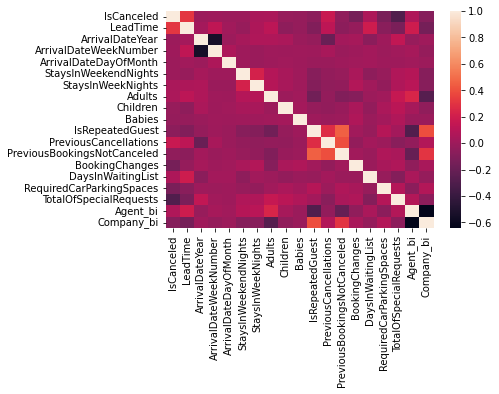

In [11]:
# heatmap
sns.heatmap( my_matrix )

In [12]:
df_trimed = df.drop(['Country','ArrivalDateMonth','Agent','Company'], axis=1)

In [13]:
cat_str = ['Meal','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','DepositType'
           ,'CustomerType']

In [14]:
#Transform categorical columns into dummy variables
df_trimed = pd.get_dummies(df_trimed
               ,columns = cat_str
               ,drop_first = True
               )

In [15]:
df_trimed.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,6,2015,27,1,0,2,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,88,2015,27,1,0,4,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,65,2015,27,1,0,4,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,92,2015,27,1,2,4,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,100,2015,27,2,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df_trimed['Children'] = df_trimed['Children'].fillna(0)

In [17]:
# Define X and y
X = df_trimed.loc[ : ,df_trimed.columns != 'IsCanceled']
y = df_trimed['IsCanceled']

In [18]:
for x in df_trimed:
    print(df_trimed[x].unique())

[0 1]
[  6  88  65  92 100  79   3  63  62  43   4  97  80  60 106  68  18  71
  85  75  89  83  72 111  86  73  55  69  76  61  77  54  90 117 105  51
  24  84 115  67  87 109  96 114  66  59 122 123  94 120   0 125  82 107
 103  12 118 108 119  20  22  99 112  93 132 110   2  15  98 124  16  19
  81   5  27  25 126  74   1  64 138 102  78 130 135   7  28  34 141  33
 101  13  11  36 128  30 145 142  39 121 147 140 104  41 134 150   8 133
  10  40 131   9 137 127  46  47  14 151  17  44 113  53  50 162 148 149
  21  23  37  49  26  32  52 173  45 164  42  58  48 168  31  38 175 170
  29  35 167 166  56 152 155 116  95  57 179  70 192 169 193 199 204 200
  91 198 158 210 156 174 184 180 195 216 233 212 139 242 208 146 144 159
 197 129 160 154 393 251 157 161 136 182 267 274 268 190 281 188 275 270
 265 288 143 295 443 194 437 253 207 302 259 178 289 298 286 309 196 273
 276 297 191 451 217 323 316 189 322 211 163 172 153 205 202 330 177 220
 247 213 337 282 239 256 344 245 350 290 351 

In [19]:
from sklearn.model_selection import train_test_split

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [40]:
#Random Forest using the decision tree optimized parameters
from sklearn.ensemble import RandomForestClassifier

randm_frst = RandomForestClassifier(n_estimators=100, max_depth=8,min_samples_split=2,
                                    max_leaf_nodes=18, random_state=0)

randm_frst.fit(X_train, y_train)



RandomForestClassifier(max_depth=8, max_leaf_nodes=18, random_state=0)

In [41]:
randm_frst.score(X_test, y_test)

0.8103281650489517

[Text(0.5875, 0.9444444444444444, 'Babies <= 0.5\ngini = 0.486\nsamples = 35129\nvalue = [32335, 23196]\nclass = I'),
 Text(0.5375, 0.8333333333333334, 'MarketSegment_Groups <= 0.5\ngini = 0.487\nsamples = 34969\nvalue = [32125, 23160]\nclass = I'),
 Text(0.3, 0.7222222222222222, 'DepositType_Non Refund <= 0.5\ngini = 0.461\nsamples = 28850\nvalue = [29216, 16396]\nclass = I'),
 Text(0.25, 0.6111111111111112, 'MarketSegment_Offline TA/TO <= 0.5\ngini = 0.423\nsamples = 26544\nvalue = [29193, 12764]\nclass = I'),
 Text(0.15, 0.5, 'Agent_bi <= 0.5\ngini = 0.443\nsamples = 21244\nvalue = [22504, 11116]\nclass = I'),
 Text(0.1, 0.3888888888888889, 'gini = 0.244\nsamples = 2423\nvalue = [3326, 551]\nclass = I'),
 Text(0.2, 0.3888888888888889, 'PreviousCancellations <= 0.5\ngini = 0.458\nsamples = 18821\nvalue = [19178, 10565]\nclass = I'),
 Text(0.15, 0.2777777777777778, 'CustomerType_Transient-Party <= 0.5\ngini = 0.454\nsamples = 18606\nvalue = [19156, 10242]\nclass = I'),
 Text(0.1, 0.16

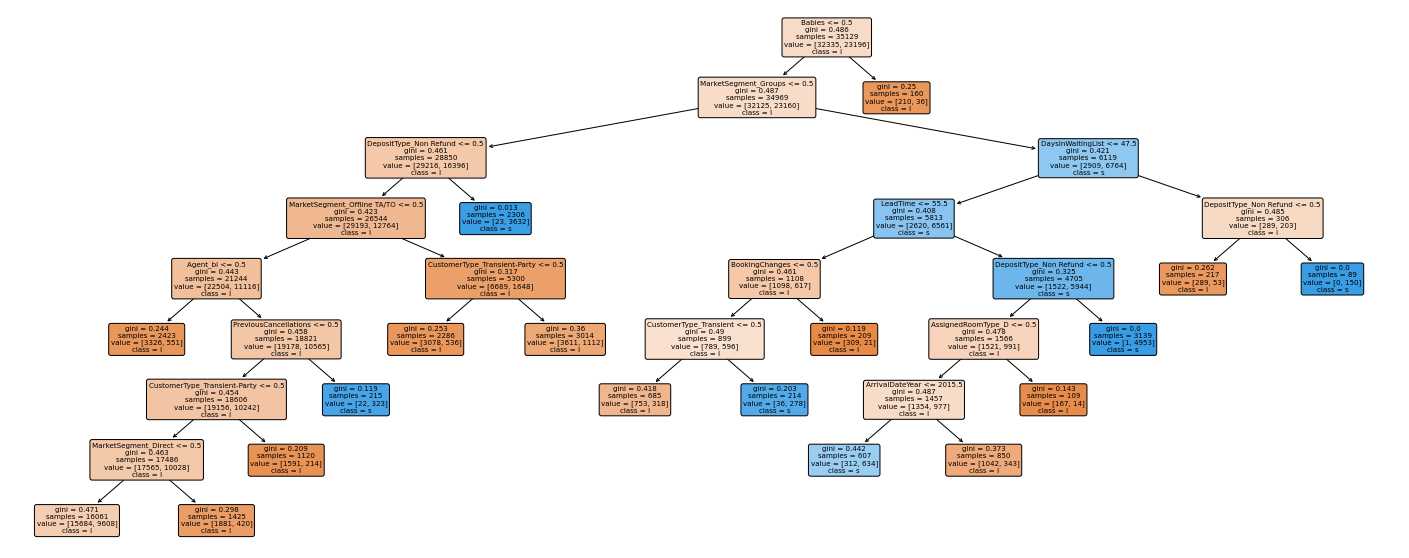

In [57]:
#acessing first decision tree i.e., with index 0

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,10))
plot_tree(randm_frst.estimators_[0], 
          feature_names = list(X.keys()),
          class_names='IsCanceled', 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.6375, 0.9444444444444444, 'TotalOfSpecialRequests <= 0.5\ngini = 0.486\nsamples = 35194\nvalue = [32378, 23153]\nclass = I'),
 Text(0.475, 0.8333333333333334, 'PreviousCancellations <= 0.5\ngini = 0.495\nsamples = 21154\nvalue = [14985, 18306]\nclass = s'),
 Text(0.35, 0.7222222222222222, 'BookingChanges <= 0.5\ngini = 0.5\nsamples = 19071\nvalue = [14895, 15112]\nclass = s'),
 Text(0.25, 0.6111111111111112, 'DepositType_Non Refund <= 0.5\ngini = 0.495\nsamples = 16689\nvalue = [11740, 14463]\nclass = s'),
 Text(0.2, 0.5, 'Agent_bi <= 0.5\ngini = 0.48\nsamples = 12427\nvalue = [11731, 7833]\nclass = I'),
 Text(0.15, 0.3888888888888889, 'gini = 0.31\nsamples = 1334\nvalue = [1720, 408]\nclass = I'),
 Text(0.25, 0.3888888888888889, 'Adults <= 2.5\ngini = 0.489\nsamples = 11093\nvalue = [10011, 7425]\nclass = I'),
 Text(0.2, 0.2777777777777778, 'Meal_SC <= 0.5\ngini = 0.485\nsamples = 10372\nvalue = [9595, 6733]\nclass = I'),
 Text(0.1, 0.16666666666666666, 'StaysInWeekNights <= 7

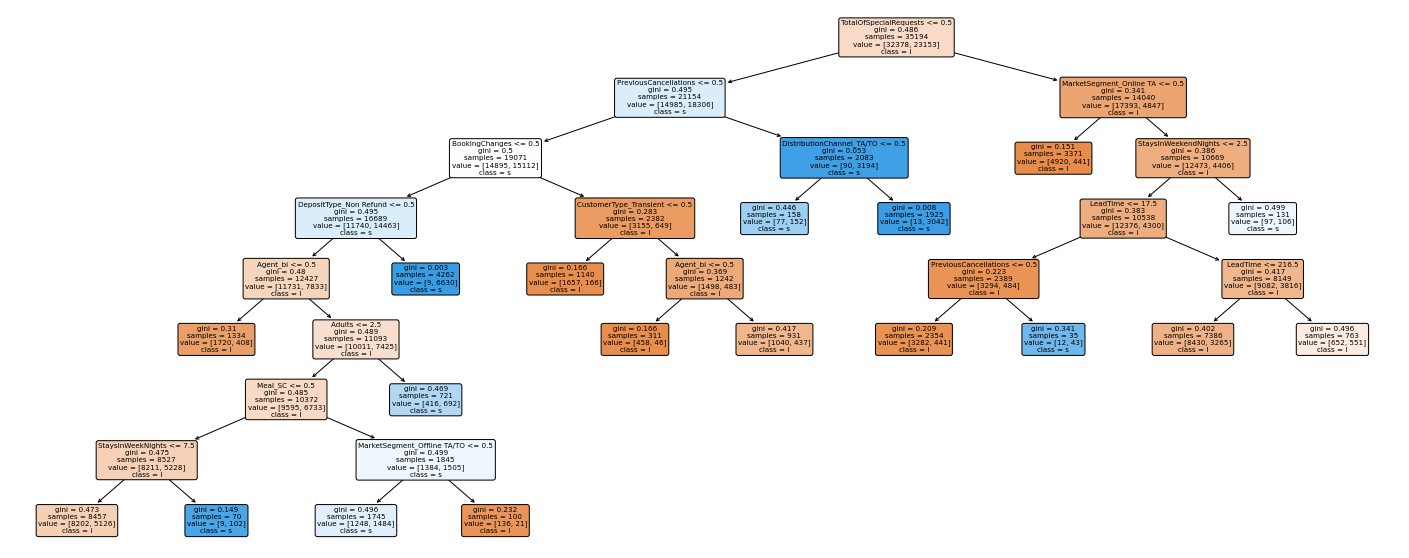

In [58]:
#acessing first decision tree i.e., with index 99

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,10))
plot_tree(randm_frst.estimators_[99], 
          feature_names = list(X.keys()),
          class_names='IsCanceled', 
          filled=True, impurity=True, 
          rounded=True)

In [48]:
#Calcualtiong accuracy using Confusion Matrix

randm_frst = randm_frst.fit(X_train,y_train)
y_pred = randm_frst.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     13889
           1       0.89      0.62      0.73      9910

    accuracy                           0.81     23799
   macro avg       0.83      0.78      0.79     23799
weighted avg       0.82      0.81      0.80     23799



In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [50]:
cm

array([[13129,   760],
       [ 3754,  6156]], dtype=int64)

<AxesSubplot:>

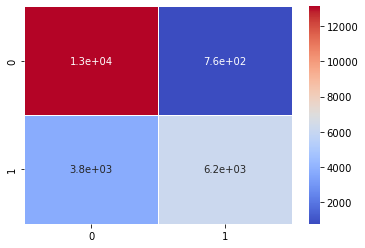

In [51]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')